Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [4]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Ud\
acity/DeepLearning-Udacity' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large.tar.gz
Found and verified /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [5]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large already present - Skipping extraction of /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large.tar.gz.
['/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/B', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/C', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/D', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/E', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/F', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/Deep

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [6]:
#Code written by LDP
#Display images from each class(directory)

number_sample_images = 10 #Number of images to be exposed from each class

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
classes_size = len(classes)

for i in range(0, classes_size):
    path_to_image = 'notMNIST_large/' + classes[i]
    image_names = os.listdir(path_to_image)
    image_names_size = len(image_names)
    for j in range(0, number_sample_images):
        #It exists a chance that an image to be taken twice
        nr_image = np.random.randint(0, image_names_size)
        print(image_names[nr_image])
        image = Image(path_to_image + '/' + image_names[nr_image])
        display(image)



VlRDIE5pZ2h0T2ZUaGVXYWNrZWREZWFkLnR0Zg==.png


RGFpbHlOZXdzLUJvbGQub3Rm.png


QnVsbGV0czMucGZi.png


R2lsbFNhbnNTaGFkb3dNVFN0ZC5vdGY=.png


Rm9ybWF0YSBCb2xkIENvbmRlbnNlZC50dGY=.png


TmljayBUdXJibyBJdGFsaWMudHRm.png


RFRMRG9jdW1lbnRhU2Fuc1NULUl0YWxpYy5vdGY=.png


R29sZHN0b25lIFJlZ3VsYXIudHRm.png


QXJnb3N5IEV4cGFuZGVkLnR0Zg==.png


TGltZXJpY2stUmVndWxhckNvbmRJdGEub3Rm.png


Q29ybmVyU3RvbmUub3Rm.png


SW5rcGFkIFJlZ3VsYXIudHRm.png


Q3JlbW9uYUV4cGVydEJRLUJvbGRPc0Yub3Rm.png


S2hhcm5vcnJpYy50dGY=.png


QWlyIE1pbGxob3VzZSBJdGFsaWMudHRm.png


Q2hhbGV0LUxvbmRvbk5pbmV0ZWVuRWlnaHR5LnBmYg==.png


Um91bmRlc3QtWGxpZ2h0Lm90Zg==.png


SW50ZXJuYXRpb25hbCBTdXBlciBIZXJvIExpZ2h0LnR0Zg==.png


QWt6aWRlbnogR3JvdGVzayBCbGFjay50dGY=.png


SHVtYW5pc3QgNTIxIExpZ2h0IEl0YWxpYy5wZmI=.png


Y2VyaXBoIDA1XzU1LnR0Zg==.png


RnV0dXJhQlEtTGlnaHRPYmxpcXVlLm90Zg==.png


U0YgV2FzYWJpIENvbmRlbnNlZCBJdGFsaWMudHRm.png


UmVsYXlXaWRlLUJsYWNrLnR0Zg==.png


dW50aXRsZWQzLnR0Zg==.png


Q29wcGVycGxhdGUgR290aGljIEhlYXZ5IEJULnR0Zg==.png


Q2l0eS1NZWRpdW0ub3Rm.png


TWFycXVpc2V0dGUgQlROIEJvbGQudHRm.png


Um95YWx0b25DbmQtTm9ybWFsLnR0Zg==.png


QmlvbmljIENvbWljLnR0Zg==.png


VHdDZW5NVFN0ZC1FeHRyYUJvbGRDb25kLm90Zg==.png


SW9sbm92YS1NZWRpdW0ub3Rm.png


Q29tcGF0aWxUZXh0IExUIEJvbGQgU21hbGwgQ2Fwcy50dGY=.png


SG9iYnkgQ29uZGVuc2VkIEl0YWxpYy50dGY=.png


RWdpemlhbm9DbGFzc2ljLVNoYWRvd09MLm90Zg==.png


QmVybGluZ0xUU3RkLUJvbGQub3Rm.png


QmVsbWFyRXh0T2JsLU5vLnR0Zg==.png


UG9ldGljYVN0ZC5vdGY=.png


TmV3cyBHb3RoaWMgTVQgSXRhbGljLnR0Zg==.png


T3Jib25JVENTdGQtQmxhY2sub3Rm.png


SHVycmljYW5lLnR0Zg==.png


QWJzdHJha3QudHRm.png


U2hha2V5U2xhYnNlcmlmLnR0Zg==.png


U2FtU2Fucy1UaGluLm90Zg==.png


QnJpZW1Ba2FkZW1pU3RkLVNlbWlib2xkQ24ub3Rm.png


QmVuamFtaW4gR290aGljIEhlYXZ5LnR0Zg==.png


VHJhbmNlZm9ybS50dGY=.png


QmVydGhvbGRJbWFnb0JRLUV4dHJhQm9sZEl0YWxpYy5vdGY=.png


WGNlbHNpb24gU2hhZG93IEl0YWxpYy50dGY=.png


TEhGIERlZiBBcnRpc3QgQkFTRS50dGY=.png


WnVyaWNoIFdpbjk1QlQoMSkudHRm.png


VmljdG9yaWFuRC50dGY=.png


U0YgV29uZGVyIENvbWljIEJsb3RjaCBJdGFsaWMudHRm.png


V2V0IFBldC50dGY=.png


TW9kZXJuMjBCVC1JdGFsaWNCLm90Zg==.png


Q2luYWhhbmQgRGluZ2JhdHMudHRm.png


U2Fmcm9sZSBPYmxpcXVlLnR0Zg==.png


RnV0dXJhSUNHLVhCb2xkT2JsaXF1ZS5vdGY=.png


SWNvbHVrdS1SZWd1bGFyLm90Zg==.png


TW9zdGx5V2F2ZXMgUmVndWxhci50dGY=.png


Q2FydHdyaWdodC50dGY=.png


Um9tYW5TY3JpcHRFRi1BbHRlcm5hdGUub3Rm.png


VmFtcGlyZXNzLnR0Zg==.png


VW5pdmVyc0xUU3RkLU9ibC5vdGY=.png


S3JvZWdlcjA2NjUudHRm.png


V2Fsa3dheSBFeHBhbmQgQmxhY2sudHRm.png


RXhwZWwgTm9ybWFsLnR0Zg==.png


TWFsYWhpdCBCb2xkLnR0Zg==.png


TW9vbkRhbmNlVHdvLnR0Zg==.png


VGluc25pcHMub3Rm.png


TVdhbGJhdW0ub3Rm.png


Q2FmZXRlcmlhLUJvbGQub3Rm.png


RmFybmhhbVRleHQtUmVndWxhckl0YWwub3Rm.png


U0YgU3BlZWR3YXlzdGFyLnR0Zg==.png


UmVsYXlDb21wLUxpZ2h0LnR0Zg==.png


VXRvcGlhLUJvbGRJdGFsaWNPc0Yub3Rm.png


RGVsdGFJdGFsaWMudHRm.png


RkZGIEJ1c2luZXNzIEJvbGQudHRm.png


TWV0YUJsYWNrQ3lyTEYtSXRhbGljLm90Zg==.png


SHVtYW5hIFNhbnMgTWQgSVRDIFRUIE1lZGl1bUl0YS50dGY=.png


RGZDYWxsaWdyYXBoaWNPcm5hbWVudHNQbGFpbi5wZmI=.png


SmVzc2ljYSBPYmxpcXVlLnR0Zg==.png


S2FiZWxJdGNURUVEZW0udHRm.png


VGVtcGxldHQgQ29uZGVuc2VkIEl0YWxpYy50dGY=.png


QW1lcmljYW5UeXBld3JpdGVyU3RkLUJvbGQub3Rm.png


UHJpbWEgU2FucyBCb2xkIEJULnR0Zg==.png


V2lsaGVsbUtsaW5nc3BvckdvdGlzY2ggRXgudHRm.png


TWFudXNjcmlwdC1FeHRlbmRlZCBOb3JtYWwudHRm.png


Qk4gTW9vZyBCb3kudHRm.png


RmxvcmFsZXNzLnR0Zg==.png


Qm91Z2FuIEJsYWNrIFNTaSBFeHRyYSBCb2xkLnR0Zg==.png


SW50cmVwaWQgQm9sZC50dGY=.png


Q29ycG9yYXRlQUV4cGVydEJRLUxpZ2h0Lm90Zg==.png


SG9mZm1hbm4tQm9sZC5vdGY=.png


VGlmZmFueSBIZWF2eSBJdGFsaWMgQlQudHRm.png


QXV0bzItTGlnaHRMRi50dGY=.png


R2VueCBLQ29uZCBDeXIudHRm.png


UHJpbmNldG9uIHNvbGlkIENvbmRlbnNlZCBJdGFsaWMudHRm.png


TGV2aWF0aGFuLUhURi1CbGFjay5vdGY=.png


R291ZHlTYW5zSVRDYnlCVC1CbGFja0l0YWxpYy5vdGY=.png


We want to keep data in memory to access it more quickly.
Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [9]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try: #data here is normalized
      image_data = (imageio.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except (IOError, ValueError) as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle' #pickle file = python object serialization
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/B.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/C.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/D.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/E.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/F.pickle already present - Skipping pickling.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/Deep

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

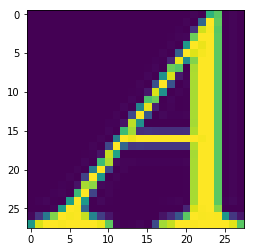

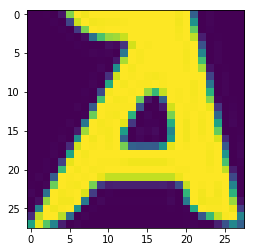

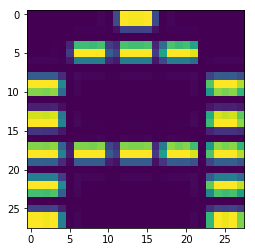

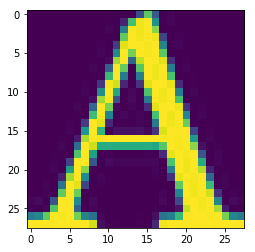

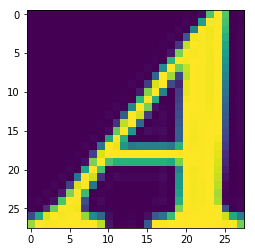

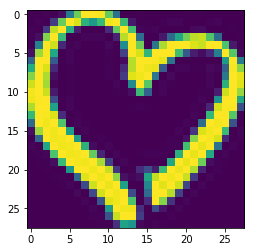

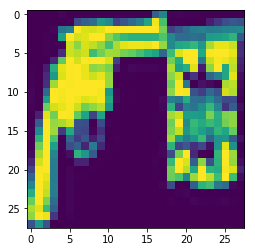

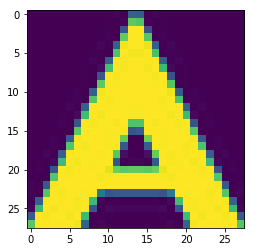

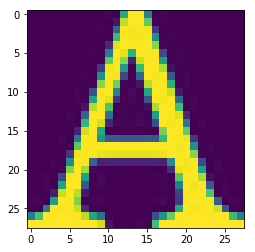

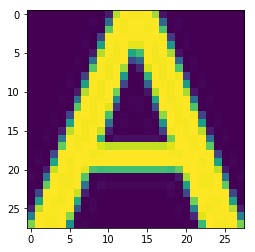

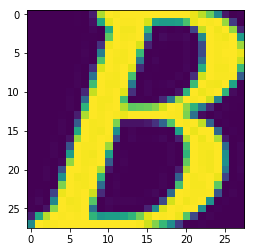

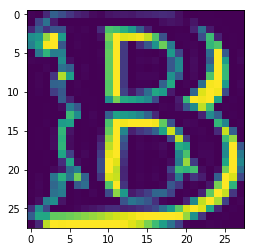

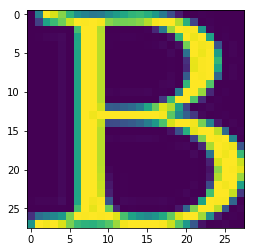

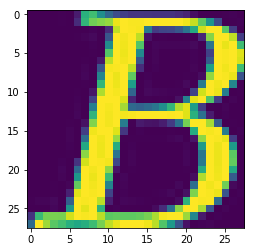

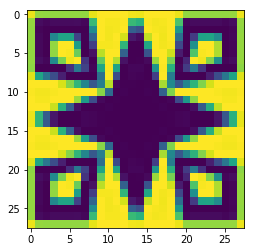

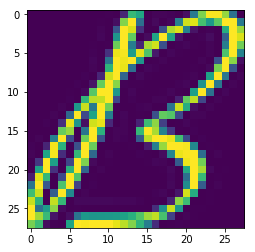

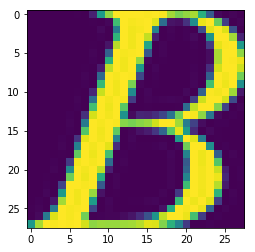

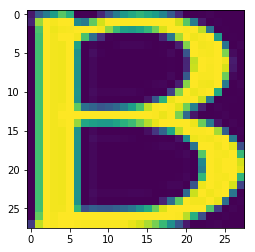

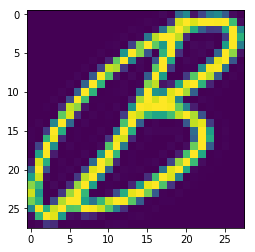

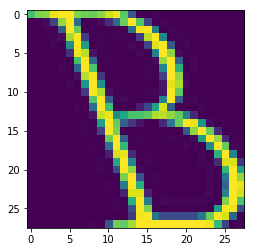

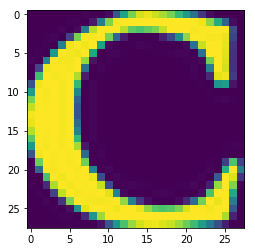

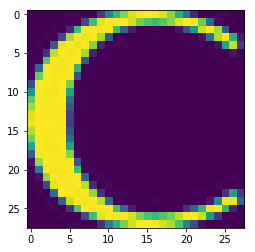

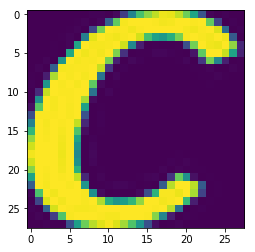

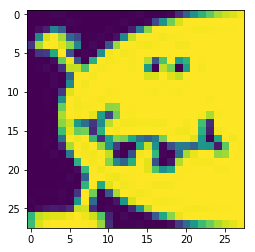

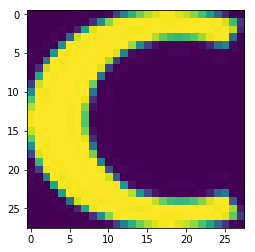

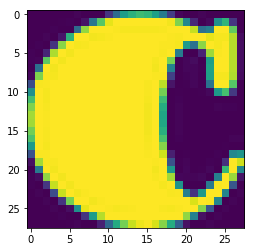

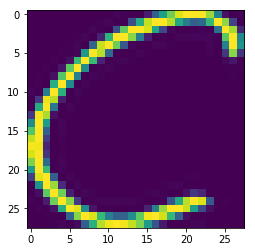

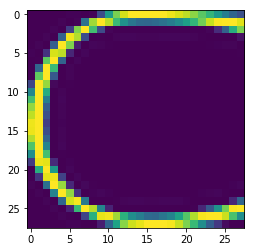

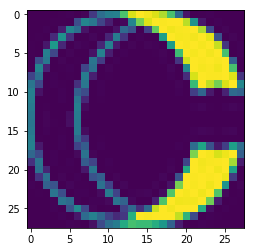

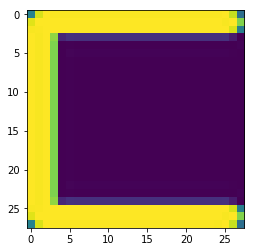

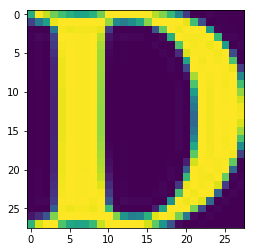

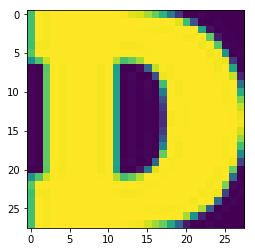

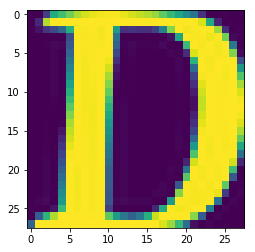

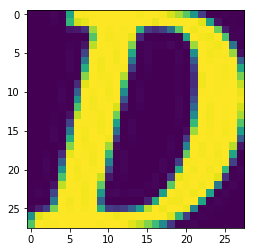

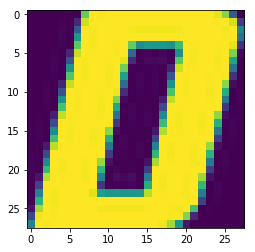

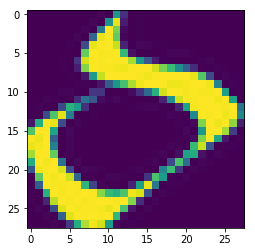

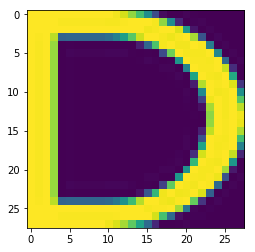

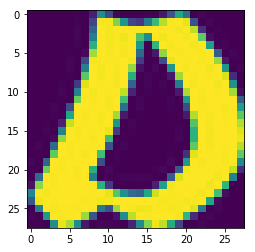

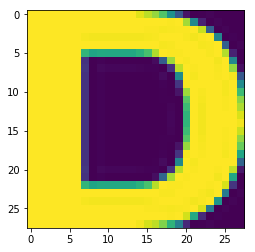

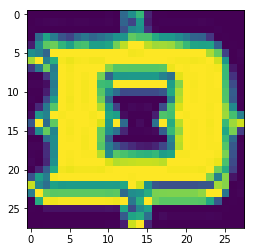

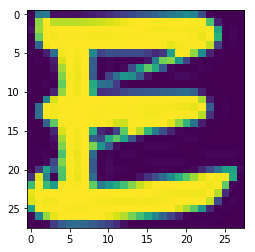

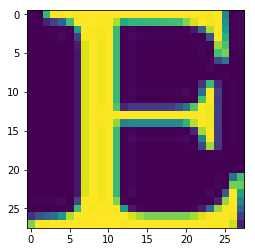

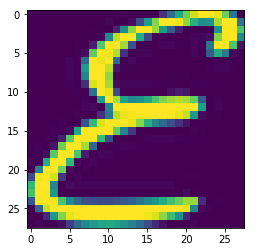

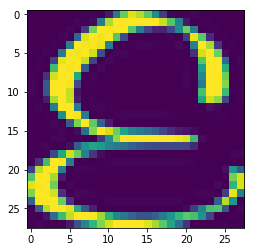

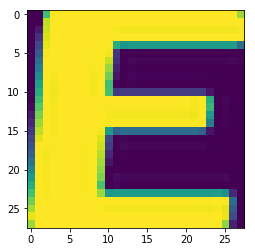

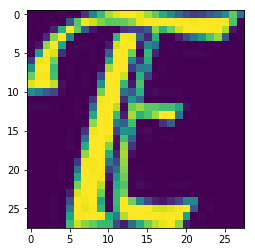

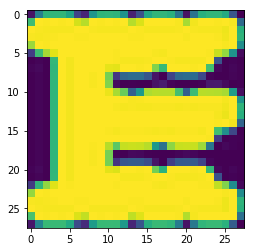

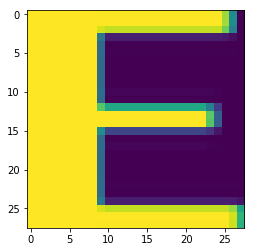

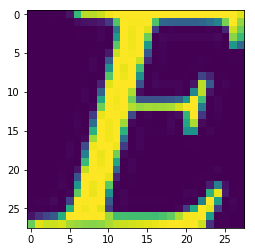

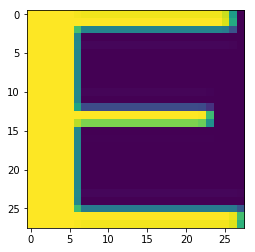

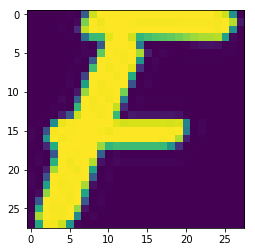

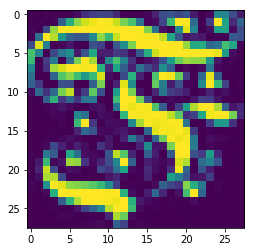

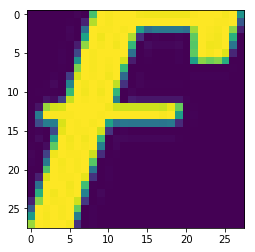

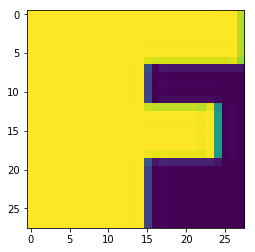

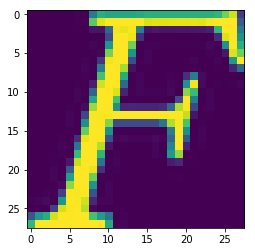

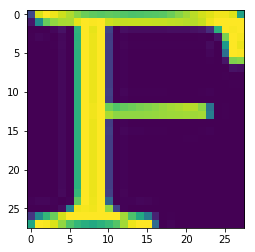

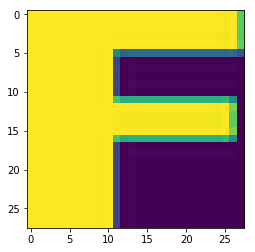

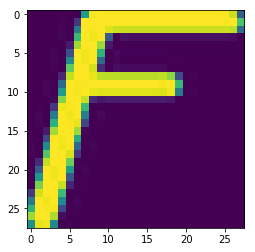

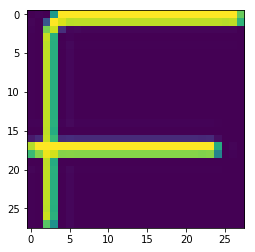

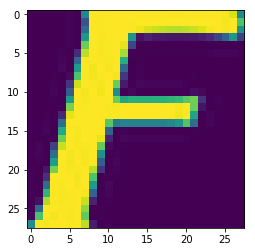

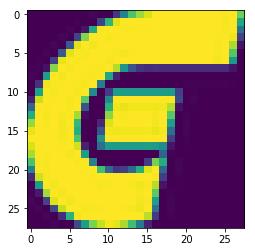

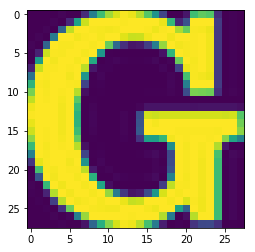

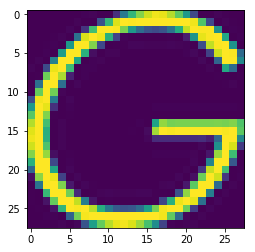

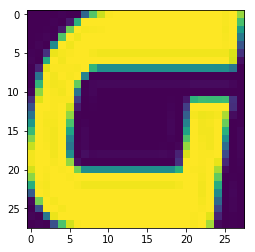

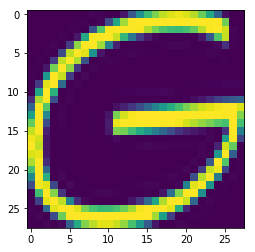

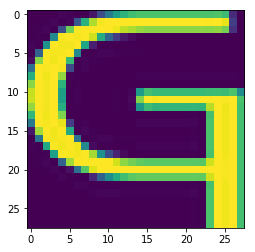

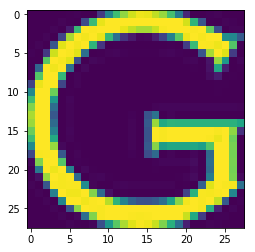

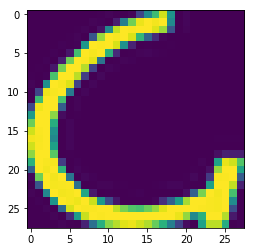

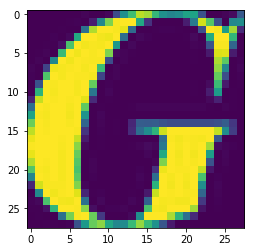

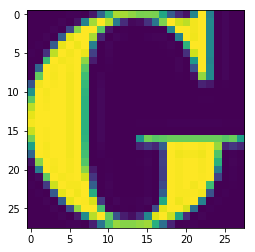

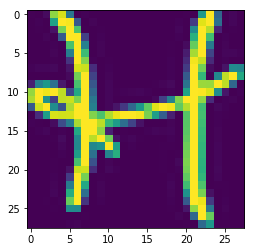

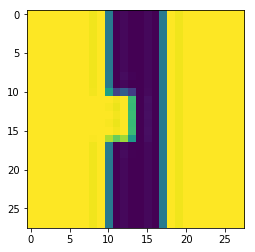

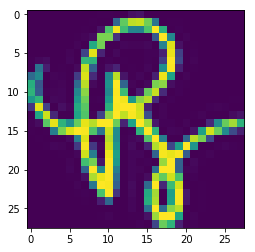

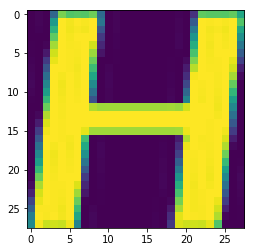

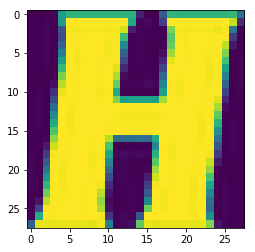

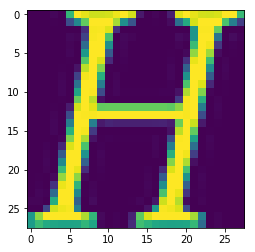

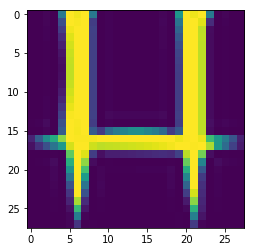

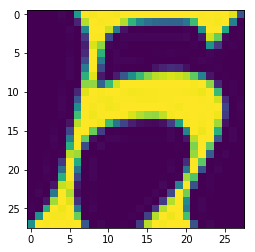

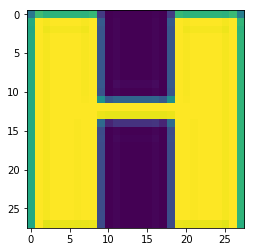

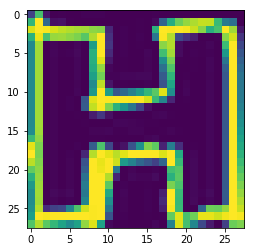

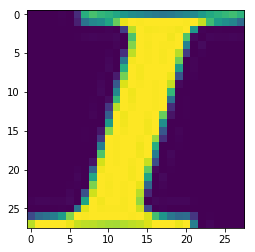

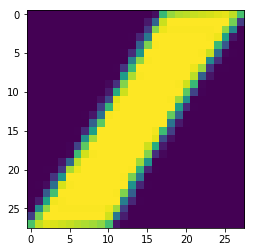

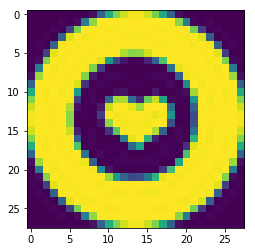

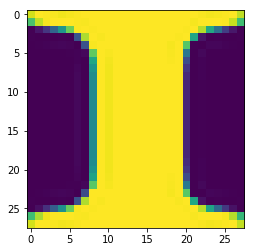

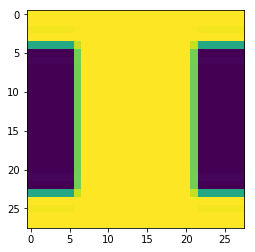

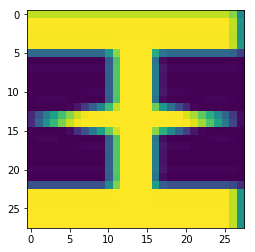

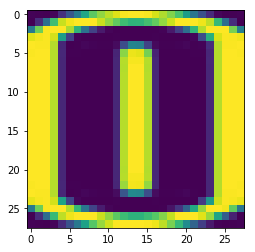

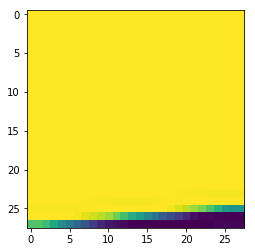

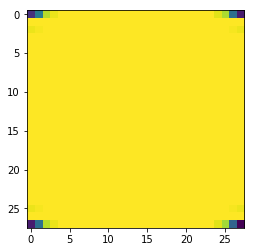

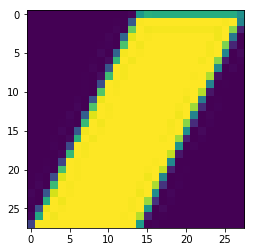

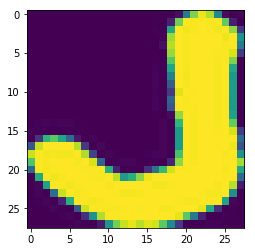

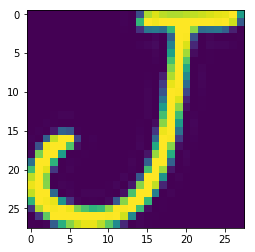

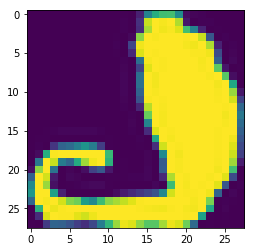

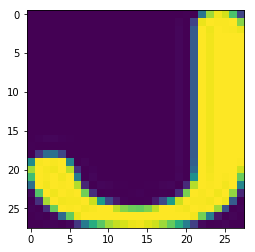

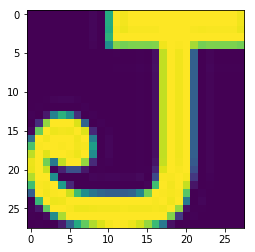

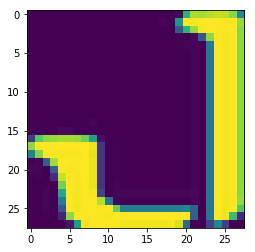

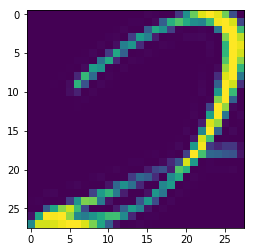

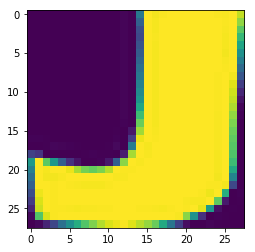

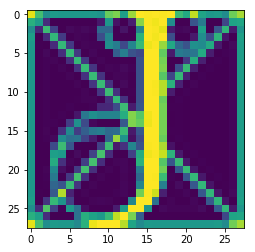

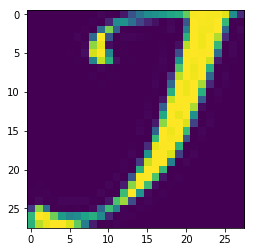

In [17]:
#Code written by LDP
#Display images from each class(directory)

number_sample_images = 10 #Number of images to be exposed from each class

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
classes_size = len(classes)

number_of_examples = []

for i in range(0, classes_size):
    #deserialization of file in order to plot the image
    pkl_file = open('notMNIST_large/' + classes[i] + '.pickle','rb')
    images_data = pickle.load(pkl_file)
    for j in range(0, number_sample_images):
        #It exists a chance that an image to be taken twice
        nr_image = np.random.randint(0, image_names_size)
        plt.imshow(images_data[nr_image], interpolation='nearest')
        plt.show()
    #create a tuple with the number of images from each class
    number_of_examples.append((classes[i],len(images_data)))
    

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [19]:
#Code written by LDP

#print the number of examples from each class
for i in range(0, len(number_of_examples)):
    print("Class " + str(number_of_examples[i][0]) + " has " + str(number_of_examples[i][1]) + " examples.")
    

Class A has 52909 examples.
Class B has 52911 examples.
Class C has 52912 examples.
Class D has 52911 examples.
Class E has 52912 examples.
Class F has 52912 examples.
Class G has 52912 examples.
Class H has 52912 examples.
Class I has 52912 examples.
Class J has 52911 examples.


Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [79]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 2000
valid_size = 500
test_size = 500

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (2000, 28, 28) (2000,)
Validation: (500, 28, 28) (500,)
Testing: (500, 28, 28) (500,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [81]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

Examples from dataset: 0
Label(Class) 2


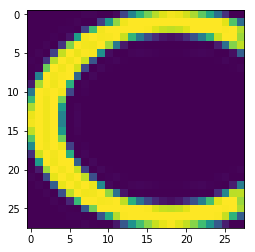

Label(Class) 7


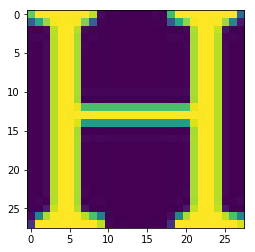

Label(Class) 5


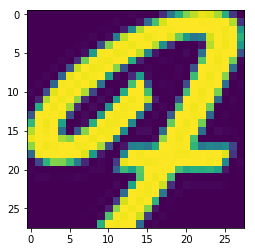

Label(Class) 9


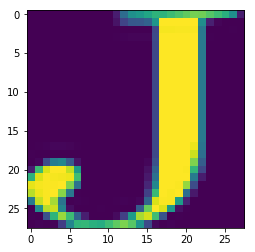

Label(Class) 8


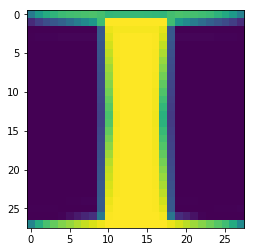

Label(Class) 4


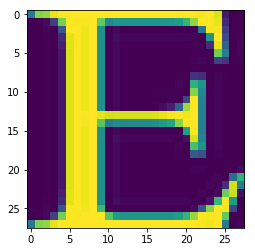

Label(Class) 9


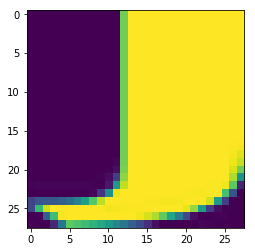

Label(Class) 7


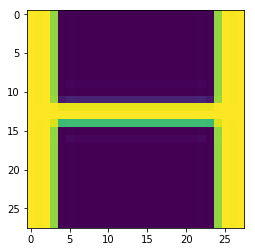

Label(Class) 0


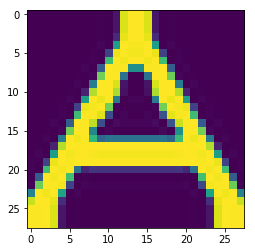

Label(Class) 0


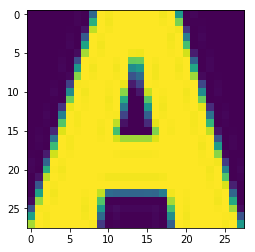

Examples from dataset: 1
Label(Class) 2


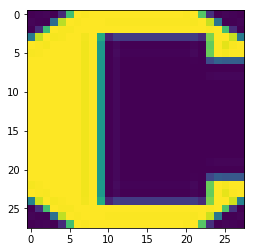

Label(Class) 5


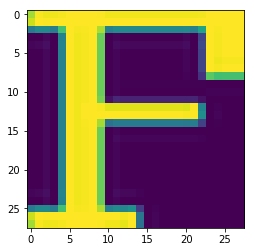

Label(Class) 4


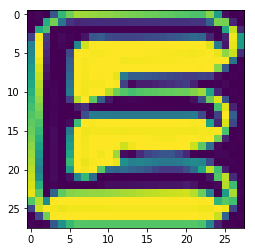

Label(Class) 7


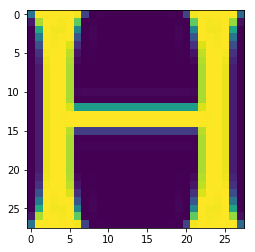

Label(Class) 0


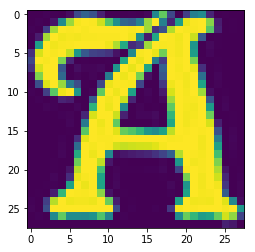

Label(Class) 2


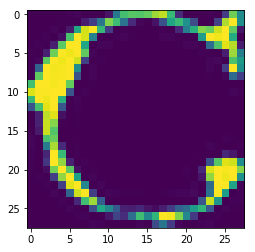

Label(Class) 7


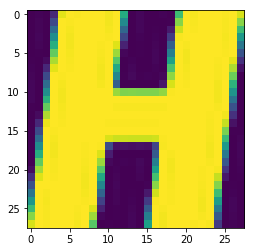

Label(Class) 0


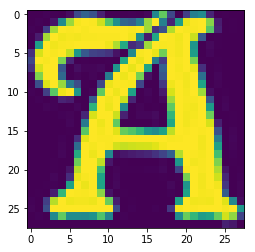

Label(Class) 9


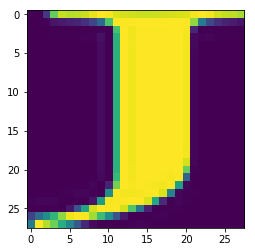

Label(Class) 3


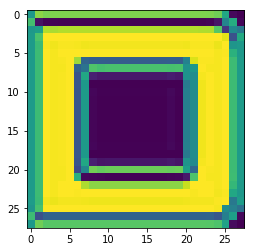

Examples from dataset: 2
Label(Class) 6


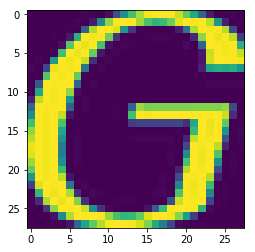

Label(Class) 3


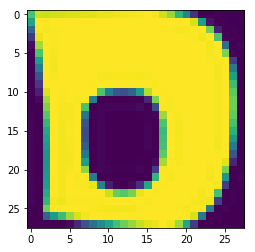

Label(Class) 7


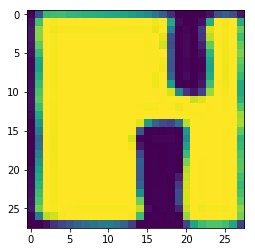

Label(Class) 3


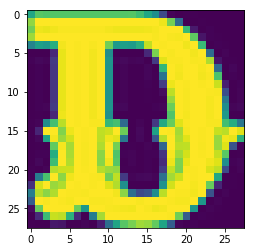

Label(Class) 6


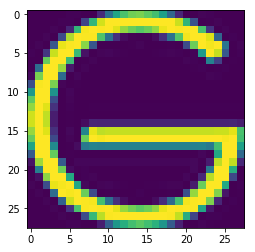

Label(Class) 3


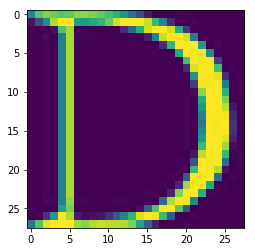

Label(Class) 6


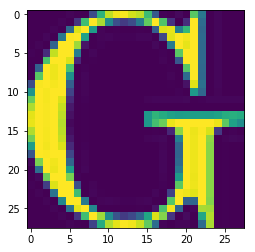

Label(Class) 4


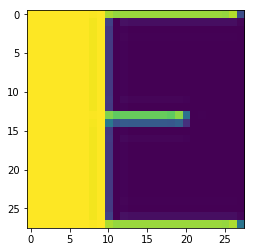

Label(Class) 8


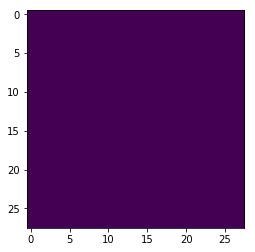

Label(Class) 3


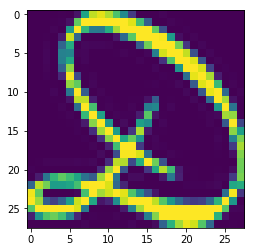

In [82]:
#Code written by LDP

nr_images = 10
dataset_to_see = [train_dataset, test_dataset, valid_dataset]
label_to_see = [train_labels, test_labels, valid_labels]

for i in range(0, len(dataset_to_see)):
    print("Examples from dataset: " + str(i))
    for j in range(0, nr_images):
        #It exists a chance that an image to be taken twice
        nr_image = np.random.randint(0, len(dataset_to_see[i]))
        print("Label(Class) " + str(label_to_see[i][nr_image]))
        plt.imshow(dataset_to_see[i][nr_image], interpolation='nearest')
        plt.show()
    

Finally, let's save the data for later reuse:

In [83]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb') #we keep the data in a dictionary
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [84]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 9420499


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [85]:
#Code written by LDP

counter_valid = 0
counter_test = 0

#compare the ndarrays
for i in range(0, len(train_dataset)):
    print(str(i))
    for j in range(0, len(valid_dataset)):
        if (np.array_equal(train_dataset[i], valid_dataset[j])):
            counter_valid = counter_valid + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [86]:
for i in range(0, len(train_dataset)):
    print(str(i))
    for j in range(0, len(test_dataset)):
        if (np.array_equal(train_dataset[i], test_dataset[j])):
            counter_test = counter_test + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [87]:
print(counter_valid)
procent = (counter_valid / len(valid_dataset)) * 100
print("The percentage of examples which are also in the train_dataset and valid_dataset")
print(procent)

116
The percentage of examples which are also in the train_dataset and valid_dataset
23.200000000000003


In [88]:
print(counter_test)
procent = (counter_test / len(test_dataset)) * 100
print("The percentage of examples which are also in the train_dataset and valid_dataset")
print(procent)

95
The percentage of examples which are also in the train_dataset and valid_dataset
19.0


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [102]:
#Code written by LDP

logistic_regr = LogisticRegression()

#https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec
nsamples, nx, ny = train_dataset.shape
d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_dataset.shape
d2_test_dataset = test_dataset.reshape((nsamples,nx*ny))


logistic_regr.fit(d2_train_dataset, train_labels)

predictions = logistic_regr.predict(d2_test_dataset)

score = logistic_regr.score(d2_test_dataset, test_labels)
print(score*100)

#TODO:try pipeline method from UCC

84.8
